## Title

In [131]:
### Purpose: 

#### Import libraries needed

In [132]:
import csv
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [133]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\alvar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [134]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
%matplotlib inline

import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

All files were downloaded from: https://fred.stlouisfed.org/
Files were downloaded with quarterly timelines. The reason why I selected quarterly is because I was planning on combining it with other reports that are only provided on a quarterly basis. 

In [135]:
ConsumerPriceIndex = pd.read_csv('./ConsumerPriceIndex.csv')
ConsumerPriceIndex = ConsumerPriceIndex.rename(columns={"CPIAUCSL": "ConsumerPriceIndex"})
#------------
CPI_PrimRent_OwnerEquivalentRent = pd.read_csv('./CPI_PrimRent_OwnerEquivalentRent.csv')
CPI_PrimRent_OwnerEquivalentRent = CPI_PrimRent_OwnerEquivalentRent.rename(columns={"CUSR0000SEHA": "RentPrimaryResidence", "CUSR0000SEHC01": 'OwnerEquivalentRent'})
#------------
DelinquencyCreditCLoans_DRCCLACBS = pd.read_csv('./DelinquencyCreditCLoans_DRCCLACBS.csv')
DelinquencyCreditCLoans_DRCCLACBS= DelinquencyCreditCLoans_DRCCLACBS.rename(columns={"DRCCLACBS": "DelinquencyCreditCLoans"})
#------------
FedFundsEffectiveRate_MonthlyAve = pd.read_csv('./FedFundsEffectiveRate_MonthlyAve.csv')
FedFundsEffectiveRate_MonthlyAve = FedFundsEffectiveRate_MonthlyAve.rename(columns={"DFF": "FedFundsEffectiveRate_MonthlyAve"})
#------------
MULTJobHolders_Pri_FT_Sec_PT = pd.read_csv('./MULTJobHolders_Pri_FT_Sec_PT.csv')
MULTJobHolders_Pri_FT_Sec_PT = MULTJobHolders_Pri_FT_Sec_PT.rename(columns={"LNU02026625": "MULTJobHolders_Pri_FT_Sec_PT"})
#------------
MULTJobHolders_Pri_Sec_BothFT = pd.read_csv('./MULTJobHolders_Pri_Sec_BothFT.csv')
MULTJobHolders_Pri_Sec_BothFT = MULTJobHolders_Pri_Sec_BothFT.rename(columns={"LNU02026631": "MULTJobHolders_Pri_Sec_BothFT"})
#------------
MULTJobHolders_Pri_Sec_BothPT = pd.read_csv('./MULTJobHolders_Pri_Sec_BothPT.csv')
MULTJobHolders_Pri_Sec_BothPT = MULTJobHolders_Pri_Sec_BothPT.rename(columns={"LNU02026628": "MULTJobHolders_Pri_Sec_BothPT"})
#------------
MULTJobHoldersPerc_ofEmployed_MEN = pd.read_csv('./MULTJobHoldersPerc_ofEmployed_GENDER_MEN.csv')
MULTJobHoldersPerc_ofEmployed_MEN = MULTJobHoldersPerc_ofEmployed_MEN.rename(columns={"LNU02026622": "MULTJobHolders_Perc_ofEmployed_M"})
#------------
MULTJobHoldersPerc_ofEmployed_WOMEN = pd.read_csv('./MULTJobHoldersPerc_ofEmployed_GENDER_WOMEN.csv')
MULTJobHoldersPerc_ofEmployed_WOMEN = MULTJobHoldersPerc_ofEmployed_WOMEN.rename(columns={"LNU02026624": "MULTJobHoldersPerc_ofEmployed_W"})
#------------
MULTJobHoldersPerc_ofEmployed = pd.read_csv('./MULTJobHoldersPerc_ofEmployed.csv')
MULTJobHoldersPerc_ofEmployed = MULTJobHoldersPerc_ofEmployed.rename(columns={"LNS12026620": "MULTJobHoldersPerc_ofEmployed"})


In [136]:
#merging all dataframes with  "Date" column
dfs = [# economic files
    ConsumerPriceIndex, CPI_PrimRent_OwnerEquivalentRent, DelinquencyCreditCLoans_DRCCLACBS, FedFundsEffectiveRate_MonthlyAve,
    # different types of multi job holder files
    MULTJobHolders_Pri_FT_Sec_PT, MULTJobHolders_Pri_Sec_BothFT, MULTJobHolders_Pri_Sec_BothPT, MULTJobHoldersPerc_ofEmployed_MEN, MULTJobHoldersPerc_ofEmployed_WOMEN,
    MULTJobHoldersPerc_ofEmployed
]
combined_df = dfs[0]
for df in dfs[1:]:
    combined_df = pd.merge(combined_df, df, on='DATE', how='inner')  # Use inner join to keep only matching dates


combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])  
combined_df = combined_df[combined_df['DATE'] >= '1994-01-01']  # Filter dates this is the start date selecting everything onward

In [137]:
# As you can see, it is quarterly 
combined_df.head(4)

,DATE,ConsumerPriceIndex,RentPrimaryResidence,OwnerEquivalentRent,DelinquencyCreditCLoans,FedFundsEffectiveRate_MonthlyAve,MULTJobHolders_Pri_FT_Sec_PT,MULTJobHolders_Pri_Sec_BothFT,MULTJobHolders_Pri_Sec_BothPT,MULTJobHolders_Perc_ofEmployed_M,MULTJobHoldersPerc_ofEmployed_W,MULTJobHoldersPerc_ofEmployed
0,1994-01-01,146.3,152.2,163.1,3.60,3.050645,3906,245,1403,5.6,5.6,5.8
1,1994-04-01,147.2,153.3,164.7,3.29,3.555000,4269,250,1580,5.9,6.2,6.0
2,1994-07-01,148.4,154.0,165.6,3.25,4.256129,4023,284,1529,5.7,5.8,5.9
3,1994-10-01,149.4,155.1,167.6,3.29,4.760000,4388,209,1776,6.2,6.1,5.9


In [138]:
combined_df.tail(4)

,DATE,ConsumerPriceIndex,RentPrimaryResidence,OwnerEquivalentRent,DelinquencyCreditCLoans,FedFundsEffectiveRate_MonthlyAve,MULTJobHolders_Pri_FT_Sec_PT,MULTJobHolders_Pri_Sec_BothFT,MULTJobHolders_Pri_Sec_BothPT,MULTJobHolders_Perc_ofEmployed_M,MULTJobHoldersPerc_ofEmployed_W,MULTJobHoldersPerc_ofEmployed
118,2023-07-01,304.628,400.873,391.536,2.96,5.12,4556,421,2003,4.6,5.5,5.1
119,2023-10-01,307.531,406.561,396.791,3.08,5.33,4978,394,1978,4.7,5.9,5.2
120,2024-01-01,309.685,411.460,402.651,3.15,5.33,4602,416,2048,4.7,5.5,5.1
121,2024-04-01,313.207,416.507,407.894,3.25,5.33,4844,376,2091,4.7,5.7,5.2


#### The combined dataframe includes intergers and floats. I initially changed the floats to integers and realized that it changes the results in a misleading way. The floats are valueable information that change the figure directions. 

In [139]:
print("----DataFrame Info----")
print(combined_df.info())
print("----DataFrame Shape----")
print(combined_df.shape)

----DataFrame Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DATE                              122 non-null    datetime64[ns]
 1   ConsumerPriceIndex                122 non-null    float64       
 2   RentPrimaryResidence              122 non-null    float64       
 3   OwnerEquivalentRent               122 non-null    float64       
 4   DelinquencyCreditCLoans           122 non-null    float64       
 5   FedFundsEffectiveRate_MonthlyAve  122 non-null    float64       
 6   MULTJobHolders_Pri_FT_Sec_PT      122 non-null    int64         
 7   MULTJobHolders_Pri_Sec_BothFT     122 non-null    int64         
 8   MULTJobHolders_Pri_Sec_BothPT     122 non-null    int64         
 9   MULTJobHolders_Perc_ofEmployed_M  122 non-null    float64       
 10  MULTJobHoldersPerc_ofEmploy

In [140]:
combined_df.isnull().sum()

DATE                                0
ConsumerPriceIndex                  0
RentPrimaryResidence                0
OwnerEquivalentRent                 0
DelinquencyCreditCLoans             0
FedFundsEffectiveRate_MonthlyAve    0
MULTJobHolders_Pri_FT_Sec_PT        0
MULTJobHolders_Pri_Sec_BothFT       0
MULTJobHolders_Pri_Sec_BothPT       0
MULTJobHolders_Perc_ofEmployed_M    0
MULTJobHoldersPerc_ofEmployed_W     0
MULTJobHoldersPerc_ofEmployed       0
dtype: int64

In [141]:
#EXPORTED FOR FUTURE USE
combined_df = pd.DataFrame(combined_df)
combined_df.to_csv('NEW_FILE_combined_df.csv', index=False)

In [142]:
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])
combined_df['Year'] = combined_df['DATE'].dt.year
# convert the date to year

### Annual Combined Statistics:
Initially, I examined the overall statistics for the entire dataset, which provided a summary across all years. However, the large variations over time made it difficult to gain meaningful insights from the combined data. To better understand the trends and fluctuations, I decided to analyze the statistics on a yearly basis, allowing for a clearer view of how these values changed over time.

In [143]:
# Group by 'Year' and calculate mean, median, and std
annual_statistics = combined_df.groupby('Year').agg({
    'ConsumerPriceIndex': ['mean', 'median', 'std'],
    'RentPrimaryResidence': ['mean', 'median', 'std'],
    'OwnerEquivalentRent': ['mean', 'median', 'std'],
    'DelinquencyCreditCLoans': ['mean', 'median', 'std'],
    'FedFundsEffectiveRate_MonthlyAve': ['mean', 'median', 'std'],
    'MULTJobHolders_Pri_FT_Sec_PT': ['mean', 'median', 'std'],
    'MULTJobHolders_Pri_Sec_BothFT': ['mean', 'median', 'std'],
    'MULTJobHolders_Pri_Sec_BothPT': ['mean', 'median', 'std'],
    'MULTJobHolders_Perc_ofEmployed_M': ['mean', 'median', 'std'],
    'MULTJobHoldersPerc_ofEmployed_W': ['mean', 'median', 'std'],
    'MULTJobHoldersPerc_ofEmployed': ['mean', 'median', 'std']
})
annual_mode = combined_df.groupby('Year').agg(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x)) > 0 else None)
annual_combined_stats = pd.concat([annual_statistics, annual_mode.add_suffix('_mode')], axis=1)
annual_combined_stats


,"(ConsumerPriceIndex, mean)","(ConsumerPriceIndex, median)","(ConsumerPriceIndex, std)","(RentPrimaryResidence, mean)","(RentPrimaryResidence, median)","(RentPrimaryResidence, std)","(OwnerEquivalentRent, mean)","(OwnerEquivalentRent, median)","(OwnerEquivalentRent, std)","(DelinquencyCreditCLoans, mean)",...,RentPrimaryResidence_mode,OwnerEquivalentRent_mode,DelinquencyCreditCLoans_mode,FedFundsEffectiveRate_MonthlyAve_mode,MULTJobHolders_Pri_FT_Sec_PT_mode,MULTJobHolders_Pri_Sec_BothFT_mode,MULTJobHolders_Pri_Sec_BothPT_mode,MULTJobHolders_Perc_ofEmployed_M_mode,MULTJobHoldersPerc_ofEmployed_W_mode,MULTJobHoldersPerc_ofEmployed_mode
Year,,,,,,,,,,,,,,,,,,,,,
1994,147.82500,147.8000,1.357387,153.65000,153.6500,1.217922,165.25000,165.1500,1.877054,3.3575,...,152.200,163.100,3.29,3.050645,3906,209,1403,5.6,5.6,5.9
1995,152.10000,152.2000,1.272792,157.47500,157.5000,1.175798,170.82500,170.7500,1.977161,3.7450,...,156.100,168.600,3.48,5.527419,4288,233,1533,5.8,6.3,6.0
1996,156.50000,156.5500,1.476482,161.57500,161.6000,1.463728,176.37500,176.3500,1.562850,4.3425,...,159.900,174.600,4.04,5.223667,4013,239,1605,5.7,5.9,6.0
1997,160.30000,160.1500,0.898146,166.25000,166.2500,1.678293,181.42500,181.4500,1.744276,4.7350,...,164.300,179.400,4.70,5.254516,4270,210,1608,6.0,6.3,6.2
1998,162.82500,162.7000,0.888351,171.60000,171.5500,1.937352,187.32500,187.3000,2.027108,4.7450,...,169.400,185.000,4.76,5.070968,4236,266,1563,6.0,6.2,6.1
1999,166.35000,166.3000,1.427118,177.00000,177.0000,1.549193,192.55000,192.5500,1.420094,4.5975,...,175.200,190.900,4.55,4.632581,4101,282,1597,5.7,5.6,5.8
2000,171.70000,171.8000,2.019901,183.35000,183.2000,2.253146,198.15000,198.0500,1.939931,4.5100,...,180.900,196.000,4.43,5.448387,4071,250,1599,5.4,5.6,5.4
2001,176.75000,176.9000,0.929157,191.35000,191.3500,2.891943,205.50000,205.4000,2.920046,4.8600,...,188.000,202.200,4.69,2.485161,3751,240,1485,5.1,5.4,5.2
2002,179.55000,179.6500,1.461734,199.15000,199.2500,1.939931,214.15000,214.2500,2.275229,4.8625,...,196.800,211.400,4.78,1.729032,3808,226,1522,5.1,5.5,5.3


In [144]:
# Assuming the dataframe is called 'annual_combined_stats'
# and YEAR is set as the index

# Create a list of mean columns
mean_columns = [
    ('ConsumerPriceIndex', 'mean'),
    ('RentPrimaryResidence', 'mean'),
    ('OwnerEquivalentRent', 'mean'),
    ('DelinquencyCreditCLoans', 'mean'),
    ('FedFundsEffectiveRate_MonthlyAve', 'mean'),
    ('MULTJobHolders_Pri_FT_Sec_PT', 'mean'),
    ('MULTJobHolders_Pri_Sec_BothFT', 'mean'),
    ('MULTJobHolders_Pri_Sec_BothPT', 'mean'),
    ('MULTJobHolders_Perc_ofEmployed_M', 'mean'),
    ('MULTJobHoldersPerc_ofEmployed_W', 'mean'),
    ('MULTJobHoldersPerc_ofEmployed', 'mean')
]

# Calculate the difference over time for each 'mean' column
for col in mean_columns:
    diff_column_name = f"{col[0]}_mean_diff"
    annual_combined_stats[diff_column_name] = annual_combined_stats[col].diff()


### Recession Periods: 
These recession periods will be added across figures in order to obsserve how the variables are impacted during those times. 

In [183]:
annual_combined_stats.index = pd.to_datetime(annual_combined_stats.index, format='%Y')
# Recession periods
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

### Annual Mean Differences with Recession Periods Highlighted:
After reviewing the annual statistics table that displayed the variable means for each year, I noticed significant year-over-year fluctuations in the mean differences in the recent years. As a result, these charts were created to visualize the annual percentage changes. I chose to focus on key variables such as the Consumer Price Index Mean Diff, Delinquency Credit Loans Mean Diff, Owner Equivalent Rent Mean Diff, and Rent Primary Residence Mean Diff because I hypothesize that these factors may influence individuals to take on second jobs. The goal is to assess the strength of these variables' impact over time and observe how they trended, especially during periods of economic recession.

In [191]:
# 4 charts in one row
fig = sp.make_subplots(rows=1, cols=4, subplot_titles=[
    'Consumer Price Index Mean YoY Diff', 'Delinquency Credit Card Loans Mean YoY Diff',
    'Owner Equivalent Rent Mean YoY Diff', 'Rent Primary Residence Mean YoY Diff'
])

# Define the variables to plot
variables = ['ConsumerPriceIndex_mean_diff', 'DelinquencyCreditCLoans_mean_diff',
             'OwnerEquivalentRent_mean_diff', 'RentPrimaryResidence_mean_diff']

# Add each bar chart to the subplot grid
# this is looking at each variable in the variables list
for i, var in enumerate(variables):
    fig.add_trace(go.Bar(x=annual_combined_stats.index, y=annual_combined_stats[var], name=var), row=1, col=i+1)

# Set the min and max for each subplot y-axis based on the data range
for i, var in enumerate(variables):
    y_min = annual_combined_stats[var].min()  # Get min value for the y-axis
    y_max = annual_combined_stats[var].max()  # Get max value for the y-axis
    fig.update_yaxes(range=[y_min, y_max], row=1, col=i+1)

# Add recession periods 
for period in recession_periods:
    for i in range(1, 5):  # 4 charts in total
        fig.add_shape(
            type="rect",
            xref="x", yref="y", 
            x0=pd.to_datetime(period['start']), x1=pd.to_datetime(period['end']),
            y0=y_min, y1=y_max,  
            fillcolor="grey", opacity=0.5, layer="below", line_width=0,
            row=1, col=i
        )

fig.update_layout(height=600, width=1700, title_text="Annual YoY Mean Differences with Recession Periods in Grey Shading", showlegend=False)
fig.show()



### INTERPRETATION - Annual Mean Differences with Recession Periods Highlighted:
**Comsumer Price Index Mean YOY Diff** - It appears interesting that CPI increased YoY before every recession. For example, CPI appear to grow every year from 1998 to 2000, and also 2007 to 2008. The only recession that did not include CPI increases were the 2020 recession induced by the sudden Covid Crisis. CPI appears to decrease during and at least one year after every recession except for 2020. CPI had a drastic increase YoY from 2020-2022 probably due to Federal Reverse monetary policy. However, since then, there has been continous YoY decrease in CPI. 

**Delinquency Credit Card Loans Mean YoY Diff** - (The Reccession Shades look weird due to the positive and negative axes) - Delinquencies in Credit Cards incresed before and during the recession periods of 2000 and 2008. However, similar to the CPI trend, the 2020 Covid induced recession did not have a YoY increase before it. There appears to be a YoY decrease in the mean of delinquencies between 2023-2024 thus far. 

**Owner Equivalent Rent Mean YoY Diff** - The Owner Equivalent Rent trend appear different compared to CPI, Credit Card Delinquencies, and Rent Primary Residences. For example, Owner Equivalent Rent had an up trend YoY from 1999-2002 meaning it increase despite the 2001 recession. Then started a down trend after the recession. Whereas during the 2008 financial crisis recession, there was a downtrend before the recession and continued afterwards. Lastly, during the Covid recession, the was a 1 year down trend which was short lived as a dramatic uptrend started from 2022-2023. 




In [148]:
#EXPORTED FOR FUTURE USE
annual_combined_stats = pd.DataFrame(annual_combined_stats)
annual_combined_stats.to_csv('NEW_FILE:annual_combined_stats.csv', index=False)

In [149]:
pip install nbformat


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\alvar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [150]:
years = annual_statistics.index
mean_values = annual_statistics['ConsumerPriceIndex']['mean']
std_values = annual_statistics['ConsumerPriceIndex']['std']

# 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('CPI with Std Shaded', 'CPI with Std Error Bars'))

#  Line chart with shaded standard deviation
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines',
        name='Mean CPI',
        line=dict(color='darkblue'),
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values + std_values,
        mode='lines',
        fill=None,
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        showlegend=False
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values - std_values,
        mode='lines',
        fill='tonexty',
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        name='±1 Std Dev',
        showlegend=True
    ),
    row=1, col=1
)

# Line chart with error bars
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines+markers',
        name='Mean CPI',
        line=dict(color='blue'),
        error_y=dict(
            type='data',
            array=std_values,
            color='red',
            thickness=2,
            width=4
        )
    ),
    row=1, col=2
)

# Update layout to move the legend to the bottom
fig.update_layout(
    height=600, 
    width=1600, 
    title_text='Consumer Price Index Over Time',
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)

# Show the plot
fig.show()


In [151]:
years = annual_statistics.index
mean_values = annual_statistics['RentPrimaryResidence']['mean']
std_values = annual_statistics['RentPrimaryResidence']['std']

# 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Primary Residence Rent with Std Shaded', 'Primary Residence Rent with Std Error Bars'))

# F Line chart with shaded standard deviation
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines',
        name='Mean CPI',
        line=dict(color='darkblue'),
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values + std_values,
        mode='lines',
        fill=None,
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        showlegend=False
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values - std_values,
        mode='lines',
        fill='tonexty',
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        name='±1 Std Dev',
        showlegend=True
    ),
    row=1, col=1
)

# Line chart with error bars
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines+markers',
        name='Mean CPI',
        line=dict(color='blue'),
        error_y=dict(
            type='data',
            array=std_values,
            color='red',
            thickness=2,
            width=4
        )
    ),
    row=1, col=2
)

fig.update_layout(
    height=600, 
    width=1600, 
    title_text='Primary Residence Rent Over Time',
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)

fig.show()


In [152]:
years = annual_statistics.index
mean_values = annual_statistics['DelinquencyCreditCLoans']['mean']
std_values = annual_statistics['DelinquencyCreditCLoans']['std']

# 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Delinquency on Credit Card Loans with Std Shaded', 'Delinquency on Credit Card Loans with Std Error Bars'))

# Line chart with shaded standard deviation
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines',
        name='Mean CPI',
        line=dict(color='darkblue'),
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values + std_values,
        mode='lines',
        fill=None,
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        showlegend=False
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values - std_values,
        mode='lines',
        fill='tonexty',
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        name='±1 Std Dev',
        showlegend=True
    ),
    row=1, col=1
)

# Line chart with error bars
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines+markers',
        name='Mean CPI',
        line=dict(color='blue'),
        error_y=dict(
            type='data',
            array=std_values,
            color='red',
            thickness=2,
            width=4
        )
    ),
    row=1, col=2
)

fig.update_layout(
    height=600, 
    width=1600, 
    title_text='Delinquency on Credit Card Loans Over Time',
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)
fig.show()


In [153]:
years = annual_statistics.index
mean_values = annual_statistics['FedFundsEffectiveRate_MonthlyAve']['mean']
std_values = annual_statistics['FedFundsEffectiveRate_MonthlyAve']['std']

# 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Fed Funds Effective Rate (MonthlyAve) with Std Shaded', 'Fed Funds Effective Rate (MonthlyAve) with Std Error Bars'))

# Line chart with shaded standard deviation
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines',
        name='Mean CPI',
        line=dict(color='darkblue'),
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values + std_values,
        mode='lines',
        fill=None,
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        showlegend=False
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values - std_values,
        mode='lines',
        fill='tonexty',
        line=dict(color='rgba(0,0,255,0.2)', width=0),
        name='±1 Std Dev',
        showlegend=True
    ),
    row=1, col=1
)

# Line chart with error bars
fig.add_trace(
    go.Scatter(
        x=years,
        y=mean_values,
        mode='lines+markers',
        name='Mean CPI',
        line=dict(color='blue'),
        error_y=dict(
            type='data',
            array=std_values,
            color='red',
            thickness=2,
            width=4
        )
    ),
    row=1, col=2
)

# Legend to the bottom
fig.update_layout(
    height=600, 
    width=1600, 
    title_text='Fed Funds Effective Rate (MonthlyAve) Over Time',
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)

fig.show()


In [154]:
# Assuming 'DATE' is already set as the index
# Calculate the percentage difference for each column

combined_df = combined_df.set_index('DATE')
percentage_diff_df = combined_df.pct_change() * 100

# Add '_PctChange' to each column name
percentage_diff_df.columns = [f'{col}_PctChange' for col in combined_df.columns]

# Concatenate the original dataframe with the new percentage difference columns
combined_df_with_pct_change = pd.concat([combined_df, percentage_diff_df], axis=1)
combined_df_with_pct_change.head()


,ConsumerPriceIndex,RentPrimaryResidence,OwnerEquivalentRent,DelinquencyCreditCLoans,FedFundsEffectiveRate_MonthlyAve,MULTJobHolders_Pri_FT_Sec_PT,MULTJobHolders_Pri_Sec_BothFT,MULTJobHolders_Pri_Sec_BothPT,MULTJobHolders_Perc_ofEmployed_M,MULTJobHoldersPerc_ofEmployed_W,...,OwnerEquivalentRent_PctChange,DelinquencyCreditCLoans_PctChange,FedFundsEffectiveRate_MonthlyAve_PctChange,MULTJobHolders_Pri_FT_Sec_PT_PctChange,MULTJobHolders_Pri_Sec_BothFT_PctChange,MULTJobHolders_Pri_Sec_BothPT_PctChange,MULTJobHolders_Perc_ofEmployed_M_PctChange,MULTJobHoldersPerc_ofEmployed_W_PctChange,MULTJobHoldersPerc_ofEmployed_PctChange,Year_PctChange
DATE,,,,,,,,,,,,,,,,,,,,,
1994-01-01,146.3,152.2,163.1,3.60,3.050645,3906,245,1403,5.6,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-01,147.2,153.3,164.7,3.29,3.555000,4269,250,1580,5.9,6.2,...,0.980993,-8.611111,16.532727,9.293395,2.040816,12.615823,5.357143,10.714286,3.448276,0.00000
1994-07-01,148.4,154.0,165.6,3.25,4.256129,4023,284,1529,5.7,5.8,...,0.546448,-1.215805,19.722336,-5.762474,13.600000,-3.227848,-3.389831,-6.451613,-1.666667,0.00000
1994-10-01,149.4,155.1,167.6,3.29,4.760000,4388,209,1776,6.2,6.1,...,1.207729,1.230769,11.838715,9.072831,-26.408451,16.154349,8.771930,5.172414,0.000000,0.00000
1995-01-01,150.5,156.1,168.6,3.48,5.527419,4288,233,1533,5.8,5.8,...,0.596659,5.775076,16.122255,-2.278943,11.483254,-13.682432,-6.451613,-4.918033,1.694915,0.05015


In [155]:
# Listing the columns here so I can use the names to make the figures
combined_df_with_pct_change.columns

Index(['ConsumerPriceIndex', 'RentPrimaryResidence', 'OwnerEquivalentRent',
       'DelinquencyCreditCLoans', 'FedFundsEffectiveRate_MonthlyAve',
       'MULTJobHolders_Pri_FT_Sec_PT', 'MULTJobHolders_Pri_Sec_BothFT',
       'MULTJobHolders_Pri_Sec_BothPT', 'MULTJobHolders_Perc_ofEmployed_M',
       'MULTJobHoldersPerc_ofEmployed_W', 'MULTJobHoldersPerc_ofEmployed',
       'Year', 'ConsumerPriceIndex_PctChange',
       'RentPrimaryResidence_PctChange', 'OwnerEquivalentRent_PctChange',
       'DelinquencyCreditCLoans_PctChange',
       'FedFundsEffectiveRate_MonthlyAve_PctChange',
       'MULTJobHolders_Pri_FT_Sec_PT_PctChange',
       'MULTJobHolders_Pri_Sec_BothFT_PctChange',
       'MULTJobHolders_Pri_Sec_BothPT_PctChange',
       'MULTJobHolders_Perc_ofEmployed_M_PctChange',
       'MULTJobHoldersPerc_ofEmployed_W_PctChange',
       'MULTJobHoldersPerc_ofEmployed_PctChange', 'Year_PctChange'],
      dtype='object')

In [156]:
# List of U.S. recession periods which will be used throughout figures in the anlyses below
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

In [157]:
mean_men = combined_df_with_pct_change.groupby('Year')['MULTJobHolders_Perc_ofEmployed_M'].mean()
mean_women = combined_df_with_pct_change.groupby('Year')['MULTJobHoldersPerc_ofEmployed_W'].mean()
mean_total = combined_df_with_pct_change.groupby('Year')['MULTJobHoldersPerc_ofEmployed'].mean()

In [158]:
fig = go.Figure()

# recession shading 
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

fig.add_trace(
    go.Scatter(
        x=[None], y=[None],  # Empty scatter plot
        mode='markers',
        marker=dict(size=10, color='grey', opacity=0.5),
        showlegend=True,
        name='Recession Periods'
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_men.index,  # The years
        y=mean_men.values,  # The mean values for men
        mode='lines+markers',
        name='Men',
        line=dict(color='blue')
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_women.index,  # The years
        y=mean_women.values,  # The mean values for women
        mode='lines+markers',
        name='Women',
        line=dict(color='red')
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_total.index,  # The years
        y=mean_total.values,  # The mean values for total
        mode='lines+markers',
        name='Total',
        line=dict(color='darkgrey')
    )
)

fig.update_layout(
    height=600, 
    width=1700,
    title_text="Annual Change in Percentage of Employed People Holding Multiple Jobs",
    xaxis_title="Year",
    yaxis_title="Percentage Change",
    xaxis=dict(
        type='date',  # Change x-axis to accept date format for exact periods
        tickformat='%Y-%m',  # Format the ticks to show year and month
    ),
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)

fig.show()


In [159]:
mean_men.index = pd.to_datetime(mean_men.index, format='%Y')
mean_women.index = pd.to_datetime(mean_women.index, format='%Y')
mean_total.index = pd.to_datetime(mean_total.index, format='%Y')

fig = go.Figure()

# recession shading 
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

fig.add_trace(
    go.Scatter(
        x=[None], y=[None],  # Empty scatter plot
        mode='markers',
        marker=dict(size=10, color='grey', opacity=0.5),
        showlegend=True,
        name='Recession Periods'
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_men.index,  # The years
        y=mean_men.values,  # The mean values for men
        mode='lines+markers',
        name='Men',
        line=dict(color='black')
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_women.index,  # The years
        y=mean_women.values,  # The mean values for women
        mode='lines+markers',
        name='Women',
        line=dict(color='green')
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_total.index,  # The years
        y=mean_total.values,  # The mean values for total
        mode='lines+markers',
        name='Total',
        line=dict(color='lightblue')
    )
)

# Legend to the bottom and set x-axis to accept date format
fig.update_layout(
    height=600, 
    width=1200,
    title_text="Annual Mean Change in of MULT Job Holder Types",
    xaxis_title="Year",
    yaxis_title="Mean Count",
    xaxis=dict(
        type='date',  # Change x-axis to accept date format for exact periods
        tickformat='%Y-%m',  # Format the ticks to show year and month
    ),
    showlegend=True,
    legend=dict(
        orientation="h",   
        x=0.5,             
        y=-0.2,            
        xanchor='center',   
        yanchor='top'      
    )
)

fig.show()


In [160]:

mean_men = combined_df_with_pct_change.groupby('Year')['MULTJobHolders_Pri_FT_Sec_PT'].mean()
mean_women = combined_df_with_pct_change.groupby('Year')['MULTJobHolders_Pri_Sec_BothFT'].mean()
mean_total = combined_df_with_pct_change.groupby('Year')['MULTJobHolders_Pri_Sec_BothPT'].mean()

mean_men.index = pd.to_datetime(mean_men.index, format='%Y')
mean_women.index = pd.to_datetime(mean_women.index, format='%Y')
mean_total.index = pd.to_datetime(mean_total.index, format='%Y')

In [161]:
fig = go.Figure()

# Add recession shading 
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],  # Start of recession
        x1=recession['end'],    # End of recession
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Adding recession periods legends
fig.add_trace(
    go.Scatter(
        x=[None], y=[None],  # Empty scatter plot for legend entry
        mode='markers',
        marker=dict(size=10, color='grey', opacity=0.5),
        showlegend=True,
        name='Recession Periods'
    )
)

# 3. Stacked Bar - MULTJobHolders_Pri_FT_Sec_PT
fig.add_trace(
    go.Bar(
        x=mean_men.index,  # The x-axis (Year converted to datetime)
        y=mean_men.values,  # The mean values for men
        name='Multiple Job Holders - Primary FT & Secondary PT',
        marker_color='black'
    )
)

# 4. Stacked Bar - MULTJobHolders_Pri_Sec_BothFT
fig.add_trace(
    go.Bar(
        x=mean_women.index,  # The x-axis (Year converted to datetime)
        y=mean_women.values,  # The mean values for women
        name='Multiple Job Holders - Primary & Secondary Both FT',
        marker_color='green'
    )
)

# 5. Stacked Bar - MULTJobHolders_Pri_Sec_BothPT
fig.add_trace(
    go.Bar(
        x=mean_total.index,  # The x-axis (Year converted to datetime)
        y=mean_total.values,  # The mean values for total
        name='Multiple Job Holders - Primary & Secondary Both PT',
        marker_color='lightblue'
    )
)

# 6. Doing the Stacked bars and moving the legends to the bottom
fig.update_layout(
    barmode='stack',  # Makes the bars stacked
    height=600, 
    width=1700,
    title_text="Multiple Job Holders Mean Breakdown Over Time",
    xaxis_title="Year",
    yaxis_title="Mean Count",
    xaxis=dict(
        type='date',  # Change x-axis to handle date format
        tickformat='%Y-%m',  # Format the ticks to show year and month
    ),
    showlegend=True,
    legend=dict(
        orientation="h",   # Horizontal orientation for the legend
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the chart
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    )
)

fig.show()




In [162]:
# Ensure the 'DATE' column is in datetime format
combined_df.index = pd.to_datetime(combined_df.index)

fig = go.Figure()

# Add recession shading
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],  # Start of recession
        x1=recession['end'],    # End of recession
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# recession periods
fig.add_trace(
    go.Scatter(
        x=[None], y=[None],  # Empty scatter plot for legend entry
        mode='markers',
        marker=dict(size=10, color='grey', opacity=0.5),
        showlegend=True,
        name='Recession Periods'
    )
)

# Delinquency Credit Loans 
fig.add_trace(
    go.Scatter(
        x=combined_df.index, 
        y=combined_df['DelinquencyCreditCLoans'], 
        name='Delinquency Credit Loans',
        mode='lines',
        line=dict(color='red'),
    )
)

# MULTJobHolders_Pri_FT_Sec_PT 
fig.add_trace(
    go.Scatter(
        x=combined_df.index, 
        y=combined_df['MULTJobHolders_Pri_FT_Sec_PT'], 
        name='MULTJobHolders_Pri_FT_Sec_PT',
        mode='lines',
        line=dict(color='black'),
        yaxis='y2'  # Assign to secondary y-axis
    )
)

# Add the secondary y-axis and adjust the x-axis for date formatting
fig.update_layout(
    title='Delinquency Credit Loans and MULTJobHolders_Pri_FT_Sec_PT Over Time',
    xaxis_title='Date',
    xaxis=dict(
        type='date',  # Ensure x-axis is in date format
        tickformat='%Y-%m',  # Format ticks to show year and month
    ),
    yaxis=dict(
        title='Delinquency Credit Loans',
        titlefont=dict(color='red'),
        tickfont=dict(color='red')
    ),
    yaxis2=dict(
        title='MULTJobHolders_Pri_FT_Sec_PT',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        overlaying='y',  # Overlay on the same plot
        side='right'     # Show on the right side
    ),
    legend=dict(
        x=0.5, 
        y=1.1,
        orientation='h',
        xanchor='center'
    ),
    height=700,
    width=1600
)
fig.show()


In [163]:
DelinquencyCreditCLoans_df = combined_df['DelinquencyCreditCLoans']
DelinquencyCreditCLoans_df.tail()


DATE
2023-04-01    2.77
2023-07-01    2.96
2023-10-01    3.08
2024-01-01    3.15
2024-04-01    3.25
Name: DelinquencyCreditCLoans, dtype: float64

In [164]:
# cycle observed in the charts are the low and pearks
periods = [
    {'start': '2005-10', 'end': '2009-04'},
    {'start': '2000-01', 'end': '2001-07'},
    {'start': '2021-07', 'end': '2024-04'}  
]

cycle_results = []

for period in periods:
    start_date = pd.to_datetime(period['start'])
    end_date = pd.to_datetime(period['end'])
    
    # Filter the data for the given period
    period_data = DelinquencyCreditCLoans_df.loc[start_date:end_date]  # No need to specify the column name again
    
    if len(period_data) > 1:  # Ensure there is enough data to calculate
        start_value = period_data.iloc[0]
        end_value = period_data.iloc[-1]
        duration = (end_date - start_date).days  # Duration in days
        value_diff = end_value - start_value  # Calculate the value difference
        acceleration = value_diff / duration  # Acceleration: change in value per day
        
        cycle_results.append({
            'Start Date': start_date,
            'End Date': end_date,
            'Start Value': start_value,
            'End Value': end_value,
            'Value Difference': value_diff,
            'Duration (Days)': duration,
            'Acceleration (Value per Day)': acceleration
        })

cycle_results_df = pd.DataFrame(cycle_results)
cycle_results_df



,Start Date,End Date,Start Value,End Value,Value Difference,Duration (Days),Acceleration (Value per Day)
0,2005-10-01,2009-04-01,3.54,6.77,3.23,1278,0.002527
1,2000-01-01,2001-07-01,4.43,5.00,0.57,547,0.001042
2,2021-07-01,2024-04-01,1.54,3.25,1.71,1005,0.001701


In [165]:
DelinquencyCreditCLoans_df = DelinquencyCreditCLoans_df.to_frame(name='DelinquencyCreditCLoans')

In [166]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=DelinquencyCreditCLoans_df.index, 
        y=DelinquencyCreditCLoans_df['DelinquencyCreditCLoans'], 
        name='Delinquency Credit Loans',
        mode='lines',
        line=dict(color='red'),
    )
)

# recession periods 
for recession in recession_periods:
    start_date = pd.to_datetime(recession['start'])
    end_date = pd.to_datetime(recession['end'])
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=start_date,
        x1=end_date,
        y0=0, y1=1,
        fillcolor='grey',  
        opacity=0.3,
        layer='below',
        line_width=0
    )

# cycle periods
for period in periods:
    start_date = pd.to_datetime(period['start'])
    end_date = pd.to_datetime(period['end'])
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=start_date,
        x1=end_date,
        y0=0, y1=1,
        fillcolor='pink',  
        opacity=0.3,
        layer='below',
        line_width=0
    )

fig.update_layout(
    title='Delinquency Credit Loans with Recession and Cycle Periods Highlighted',
    xaxis_title='Date',
    yaxis_title='Delinquency Credit Loans',
    legend=dict(
        x=0.5,
        y=1.1,
        orientation="h",
        xanchor="center"
    ),
    height=500,
    width=1200
)

fig.show()


In [167]:
Multi_JobHolders_alltypes_df = combined_df[[
       'MULTJobHolders_Pri_FT_Sec_PT', 
       'MULTJobHolders_Pri_Sec_BothFT',
       'MULTJobHolders_Pri_Sec_BothPT', 
       'MULTJobHolders_Perc_ofEmployed_M',
       'MULTJobHoldersPerc_ofEmployed_W', 
       'MULTJobHoldersPerc_ofEmployed']]
print(Multi_JobHolders_alltypes_df.columns)
Multi_JobHolders_alltypes_df.tail()

Index(['MULTJobHolders_Pri_FT_Sec_PT', 'MULTJobHolders_Pri_Sec_BothFT',
       'MULTJobHolders_Pri_Sec_BothPT', 'MULTJobHolders_Perc_ofEmployed_M',
       'MULTJobHoldersPerc_ofEmployed_W', 'MULTJobHoldersPerc_ofEmployed'],
      dtype='object')


,MULTJobHolders_Pri_FT_Sec_PT,MULTJobHolders_Pri_Sec_BothFT,MULTJobHolders_Pri_Sec_BothPT,MULTJobHolders_Perc_ofEmployed_M,MULTJobHoldersPerc_ofEmployed_W,MULTJobHoldersPerc_ofEmployed
DATE,,,,,,
2023-04-01,4388,424,1808,4.4,5.2,4.8
2023-07-01,4556,421,2003,4.6,5.5,5.1
2023-10-01,4978,394,1978,4.7,5.9,5.2
2024-01-01,4602,416,2048,4.7,5.5,5.1
2024-04-01,4844,376,2091,4.7,5.7,5.2


In [168]:
# Drop any non-numeric columns like 'Year' if needed
correlation_matrix = combined_df.drop(columns=['Year'], errors='ignore').corr()
correlation_matrix


,ConsumerPriceIndex,RentPrimaryResidence,OwnerEquivalentRent,DelinquencyCreditCLoans,FedFundsEffectiveRate_MonthlyAve,MULTJobHolders_Pri_FT_Sec_PT,MULTJobHolders_Pri_Sec_BothFT,MULTJobHolders_Pri_Sec_BothPT,MULTJobHolders_Perc_ofEmployed_M,MULTJobHoldersPerc_ofEmployed_W,MULTJobHoldersPerc_ofEmployed
ConsumerPriceIndex,1.000000,0.992800,0.993654,-0.645528,-0.472224,0.005974,0.402377,0.524888,-0.824790,-0.624852,-0.795646
RentPrimaryResidence,0.992800,1.000000,0.999227,-0.658539,-0.443953,0.053324,0.430101,0.507603,-0.799774,-0.604549,-0.771800
OwnerEquivalentRent,0.993654,0.999227,1.000000,-0.639844,-0.438231,0.051969,0.438062,0.500866,-0.802205,-0.603529,-0.774160
DelinquencyCreditCLoans,-0.645528,-0.658539,-0.639844,1.000000,0.377168,0.060610,-0.171412,-0.362992,0.554638,0.541073,0.569501
FedFundsEffectiveRate_MonthlyAve,-0.472224,-0.443953,-0.438231,0.377168,1.000000,0.654174,0.220971,-0.303364,0.734177,0.663851,0.733781
MULTJobHolders_Pri_FT_Sec_PT,0.005974,0.053324,0.051969,0.060610,0.654174,1.000000,0.373569,0.199388,0.498975,0.626887,0.520937
MULTJobHolders_Pri_Sec_BothFT,0.402377,0.430101,0.438062,-0.171412,0.220971,0.373569,1.000000,0.044724,-0.119365,-0.094435,-0.106521
MULTJobHolders_Pri_Sec_BothPT,0.524888,0.507603,0.500866,-0.362992,-0.303364,0.199388,0.044724,1.000000,-0.316322,-0.021706,-0.251358
MULTJobHolders_Perc_ofEmployed_M,-0.824790,-0.799774,-0.802205,0.554638,0.734177,0.498975,-0.119365,-0.316322,1.000000,0.850209,0.974458
MULTJobHoldersPerc_ofEmployed_W,-0.624852,-0.604549,-0.603529,0.541073,0.663851,0.626887,-0.094435,-0.021706,0.850209,1.000000,0.893065


In [169]:
# Unstack the correlation matrix to get variable pairs
# Remove self-correlations
# Remove duplicates by treating A-B and B-A as the same
# Sort correlations by absolute value 

correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs != 1]
correlation_pairs = correlation_pairs.groupby(by=[frozenset([i, j]) for i, j in correlation_pairs.index]).mean()
sorted_correlations = correlation_pairs.abs().sort_values(ascending=False)


In [170]:
strong_positive = sorted_correlations[sorted_correlations > 0.75]
print("Top Strong Positive Correlations:\n", strong_positive)

Top Strong Positive Correlations:
 (OwnerEquivalentRent, RentPrimaryResidence)                            0.999227
(OwnerEquivalentRent, ConsumerPriceIndex)                              0.993654
(RentPrimaryResidence, ConsumerPriceIndex)                             0.992800
(MULTJobHoldersPerc_ofEmployed, MULTJobHolders_Perc_ofEmployed_M)      0.974458
(MULTJobHoldersPerc_ofEmployed, MULTJobHoldersPerc_ofEmployed_W)       0.893065
(MULTJobHoldersPerc_ofEmployed_W, MULTJobHolders_Perc_ofEmployed_M)    0.850209
(MULTJobHolders_Perc_ofEmployed_M, ConsumerPriceIndex)                 0.824790
(OwnerEquivalentRent, MULTJobHolders_Perc_ofEmployed_M)                0.802205
(MULTJobHolders_Perc_ofEmployed_M, RentPrimaryResidence)               0.799774
(MULTJobHoldersPerc_ofEmployed, ConsumerPriceIndex)                    0.795646
(MULTJobHoldersPerc_ofEmployed, OwnerEquivalentRent)                   0.774160
(MULTJobHoldersPerc_ofEmployed, RentPrimaryResidence)                  0.771800
dtype

In [171]:
strong_negative = sorted_correlations[sorted_correlations < -0.75]
print("Top Strong Negative Correlations:\n", strong_negative)


Top Strong Negative Correlations:
 Series([], dtype: float64)


In [172]:
combined_without_year_df = combined_df.drop(columns=['Year'])


import plotly.express as px

# Create a scatter plot matrix (pairplot) for visualizing relationships
fig = px.scatter_matrix(
    combined_without_year_df,
    dimensions=['RentPrimaryResidence', 'ConsumerPriceIndex', 
                'MULTJobHolders_Perc_ofEmployed_M', 'MULTJobHoldersPerc_ofEmployed_W'],
    title="Scatter Matrix of Strong Positive Correlations",
    labels={col: col.replace('_', ' ') for col in combined_without_year_df.columns}  # Label cleaning
)

# Update layout for better readability
fig.update_layout(
    width=1800,
    height=1200,
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    yaxis=dict(tickangle=-90)  # Rotate y-axis labels
)

# Show the plot
fig.show()


In [173]:
import plotly.express as px
import numpy as np

# Calculate the correlation matrix
corr_matrix = combined_without_year_df[['RentPrimaryResidence', 'ConsumerPriceIndex', 
                                        'MULTJobHolders_Perc_ofEmployed_M', 'MULTJobHoldersPerc_ofEmployed_W']].corr()

# Function to define the color based on the correlation strength
def get_color(value):
    if value > 0:
        return f'rgb(0, 0, {int(255 * value)})'  # Blue gradient for positive correlations
    elif value < 0:
        return f'rgb({int(255 * abs(value))}, 0, 0)'  # Red gradient for negative correlations
    else:
        return 'lightgrey'  # Diagonal (1-to-1 correlations)

# Create the scatter matrix
fig = px.scatter_matrix(
    combined_without_year_df,
    dimensions=['RentPrimaryResidence', 'ConsumerPriceIndex', 
                'MULTJobHolders_Perc_ofEmployed_M', 'MULTJobHoldersPerc_ofEmployed_W'],
    title="Scatter Matrix with Correlation Strength Indication",
    labels={col: col.replace('_', ' ') for col in combined_without_year_df.columns}
)

# Customize each plot point's marker color based on the correlation matrix
for i, dim1 in enumerate(corr_matrix.columns):
    for j, dim2 in enumerate(corr_matrix.columns):
        if i != j:  # Only change non-diagonal cells
            color = get_color(corr_matrix.loc[dim1, dim2])
            fig.update_traces(marker=dict(color=color))

# Shade or hide the diagonal
for i in range(len(corr_matrix.columns)):
    fig.update_traces(diagonal_visible=False)  # Hide diagonal plots

# Update layout for better readability
fig.update_layout(
    width=1800,
    height=1200,
    xaxis=dict(tickangle=90),
    yaxis=dict(tickangle=-90)
)

# Show the plot
fig.show()




In [174]:
combined_without_year_df = combined_df.drop(columns=['Year'])
# Additional statistics (Skewness and Kurtosis)
skewness = combined_without_year_df.skew()
kurtosis = combined_without_year_df.kurtosis()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Skewness:
 ConsumerPriceIndex                  0.334809
RentPrimaryResidence                0.500534
OwnerEquivalentRent                 0.485471
DelinquencyCreditCLoans             0.243117
FedFundsEffectiveRate_MonthlyAve    0.320839
MULTJobHolders_Pri_FT_Sec_PT        0.027111
MULTJobHolders_Pri_Sec_BothFT       0.677126
MULTJobHolders_Pri_Sec_BothPT       0.185969
MULTJobHolders_Perc_ofEmployed_M    0.619097
MULTJobHoldersPerc_ofEmployed_W     0.307323
MULTJobHoldersPerc_ofEmployed       0.469237
dtype: float64
Kurtosis:
 ConsumerPriceIndex                 -0.639361
RentPrimaryResidence               -0.619206
OwnerEquivalentRent                -0.483947
DelinquencyCreditCLoans            -0.621775
FedFundsEffectiveRate_MonthlyAve   -1.548424
MULTJobHolders_Pri_FT_Sec_PT       -0.453790
MULTJobHolders_Pri_Sec_BothFT       0.076036
MULTJobHolders_Pri_Sec_BothPT      -0.012324
MULTJobHolders_Perc_ofEmployed_M   -0.424591
MULTJobHoldersPerc_ofEmployed_W     0.581757
MULTJobHoldersPerc

In [175]:
import plotly.graph_objects as go

# Calculate the rolling mean (with a 12-month window for smoothing)
combined_df_rolling = combined_df.rolling(window=12).mean()

# Create a Plotly figure
fig = go.Figure()

# Add the original series
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['FedFundsEffectiveRate_MonthlyAve'],
    mode='lines',
    name='Original',
    line=dict(color='blue')
))

# Add the rolling mean series
fig.add_trace(go.Scatter(
    x=combined_df_rolling.index,
    y=combined_df_rolling['FedFundsEffectiveRate_MonthlyAve'],
    mode='lines',
    name='Rolling Mean (12 months)',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Original vs. Rolling Mean of Fed Funds Effective Rate (Monthly Ave)',
    xaxis_title='Date',
    yaxis_title='Fed Funds Effective Rate (Monthly Ave)',
    legend=dict(x=0.5, y=1, traceorder='normal', orientation='h'),
    width=1000,
    height=600
)

# Show the plot
fig.show()


In [176]:
# Modify the layout to move the legend to the bottom

import plotly.graph_objects as go

# List of U.S. recession periods
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

# Calculate the rolling mean (with a 12-month window for smoothing)
combined_df_rolling = combined_df.rolling(window=12).mean()

# Create a Plotly figure
fig = go.Figure()

# Add the original series
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['DelinquencyCreditCLoans'],
    mode='lines',
    name='Original',
    line=dict(color='blue')
))

# Add the rolling mean series
fig.add_trace(go.Scatter(
    x=combined_df_rolling.index,
    y=combined_df_rolling['DelinquencyCreditCLoans'],
    mode='lines',
    name='Rolling Mean (12 months)',
    line=dict(color='red')
))

# Highlight the recession periods as shaded areas
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0,
        y1=1,
        fillcolor='grey',
        opacity=0.3,
        layer='below',
        line_width=0
    )

# Update layout to move the legend to the bottom
fig.update_layout(
    title='Original vs. Rolling Mean of Delinquency in Credit Card Loans',
    xaxis_title='Date',
    yaxis_title='Delinquency in Credit Card Loans',
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    ),
    width=1000,
    height=600
)

# Show the plot
fig.show()


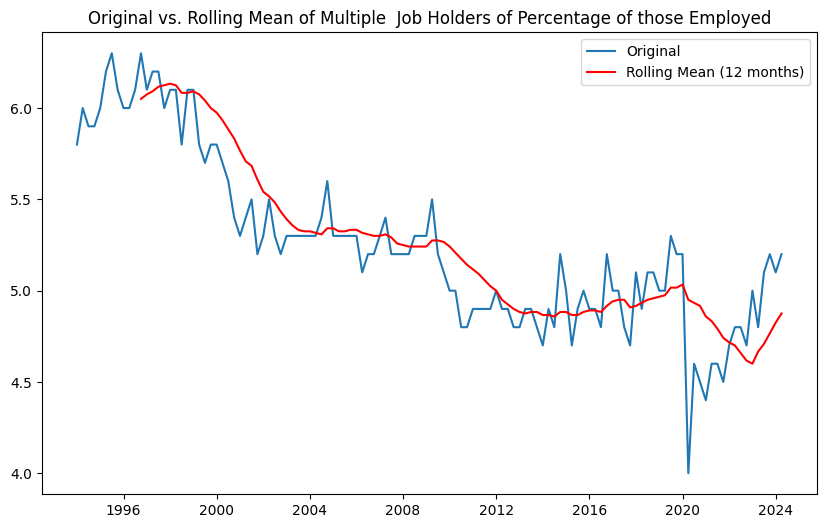

In [177]:
# Calculate rolling mean (with a 12-month window for smoothing)
combined_df_rolling = combined_df.rolling(window=12).mean()

# Plot original and smoothed series 
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['MULTJobHoldersPerc_ofEmployed'], label='Original')
plt.plot(combined_df_rolling.index, combined_df_rolling['MULTJobHoldersPerc_ofEmployed'], label='Rolling Mean (12 months)', color='red')
plt.title('Original vs. Rolling Mean of Multiple  Job Holders of Percentage of those Employed')
plt.legend()
plt.show()



In [178]:
# Calculate year-over-year percentage change for CPI, RentPrimaryResidence, and OwnerEquivalentRent
combined_df['CPI_pct_change'] = combined_df['ConsumerPriceIndex'].pct_change(periods=12) * 100
combined_df['RentPrimaryResidence_pct_change'] = combined_df['RentPrimaryResidence'].pct_change(periods=12) * 100
combined_df['OwnerEquivalentRent_pct_change'] = combined_df['OwnerEquivalentRent'].pct_change(periods=12) * 100

# Create a Plotly figure
fig = go.Figure()

# Add the percentage change of CPI (Left y-axis)
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['CPI_pct_change'],
    mode='lines',
    name='YoY % Change CPI',
    line=dict(color='green'),
    yaxis='y1'  # Assign to left y-axis
))

# Add the percentage change of Rent Primary Residence (Left y-axis)
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['RentPrimaryResidence_pct_change'],
    mode='lines',
    name='YoY % Change Rent Primary Residence',
    line=dict(color='red'),
    yaxis='y1'  # Assign to left y-axis
))

# Add the percentage change of Owner Equivalent Rent (Left y-axis)
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['OwnerEquivalentRent_pct_change'],
    mode='lines',
    name='YoY % Change Owner Equivalent Rent',
    line=dict(color='purple'),
    yaxis='y1'  # Assign to left y-axis
))

# Add the original series of MULTJobHolders_Perc_ofEmployed_M (Right y-axis)
fig.add_trace(go.Scatter(
    x=combined_df.index,
    y=combined_df['MULTJobHolders_Perc_ofEmployed_M'],
    mode='lines',
    name='Original MULT Job Holders % of Employed (Men)',
    line=dict(color='blue'),
    yaxis='y2'  # Assign to right y-axis
))

# Highlight the recession periods as shaded areas
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0,
        y1=1,
        fillcolor='grey',
        opacity=0.3,
        layer='below',
        line_width=0
    )

# Update layout with dual y-axes
fig.update_layout(
    title='YoY % Change of CPI, Rent Primary Residence, Owner Equivalent Rent & MULT Job Holders % of Employed (Men)',
    xaxis_title='Date',
    yaxis=dict(
        title="YoY % Change of CPI, Rent, and Owner Equivalent Rent",
        side="left",
        showgrid=False,
    ),
    yaxis2=dict(
        title="Percentage of MULT Job Holders (Men)",
        overlaying="y",  # Overlay this on the same plot
        side="right",
        showgrid=False,
    ),
    
    # Adjust the legend position
    legend=dict(
        orientation="h",   # Horizontal orientation
        x=0.5,             # Center the legend horizontally
        y=-0.2,            # Move the legend below the charts
        xanchor='center',   # Align the legend horizontally with the center
        yanchor='top'       # Align the legend above the bottom edge
    ),
    width=1500,
    height=600
)

# Show the plot
fig.show()

